In [35]:
import pandas as pd

In [59]:
#Load winter_full data
winter_full_data = pd.read_csv('winter_full.csv')
#Load dictionary_data
dictionary_data = pd.read_csv('dictionary.csv', usecols=['Code', 'Country'])
#Create a dictionary to map country codes to country names
country_mapping = dict(zip(dictionary_data['Code'], dictionary_data['Country']))
#Add a new column to the winter_full data with country names
winter_full_data['Country Name'] = winter_full_data['Country'].map(country_mapping)

#Add missing country names to csv
known_country_names = {
    'URS': 'USSR',
    'TCH': 'Czechoslovakia',
    'EUA': 'Austria',
    'FRG': 'Germany',
    'ROU': 'Romania',
    'GDR': 'East Germany',
    'YUG': 'Yugoslavia',
    'EUN': 'Europe Unified Team'
}

for index, row in winter_full_data.iterrows():
    country_code = row['Country']
    if pd.isna(row['Country Name']):
        if country_code in country_mapping:
            winter_full_data.at[index, 'Country Name'] = country_mapping[country_code]
        elif country_code in known_country_names:
            winter_full_data.at[index, 'Country Name'] = known_country_names[country_code]

#Save new csv file
winter_full_data.to_csv('winter_full_data_with_country.csv', index=False)


In [60]:
import pandas as pd

#Load the winter_full data with country names
winter_full_data = pd.read_csv('winter_full_data_with_country.csv', encoding='utf-8')

#Filter data 
#Date range: Post WWII, 1948-2012
#Discipline: Speed Skating
#Events: 500M, 1000M, 1500M, 3000M, 5000M, 10000M, & Team Pursuit
#Gender: Men and Women

speed_skate_events = ['500M', '1000M', '1500M', '3000M', '5000M', '10000M', 'Team Pursuit']

filtered_data = winter_full_data[
    (winter_full_data['Year'] >= 1948) & (winter_full_data['Year'] <= 2012) &
    (winter_full_data['Discipline'] == 'Speed skating') &
    (winter_full_data['Gender'].isin(['Men', 'Women'])) &
    (winter_full_data['Event'].str.contains('|'.join(speed_skate_events)))
]

#Save filtered data to a new csv file
filtered_data.to_csv('filtered_speed_skate_data.csv', index=False)

In [61]:
#Count total number of Winners in Speed Skate from 1948-2012
winter_full_data = pd.read_csv('filtered_speed_skate_data.csv')
medal_winners_count = len(filtered_data['Athlete'].unique())
medal_winners_count

252

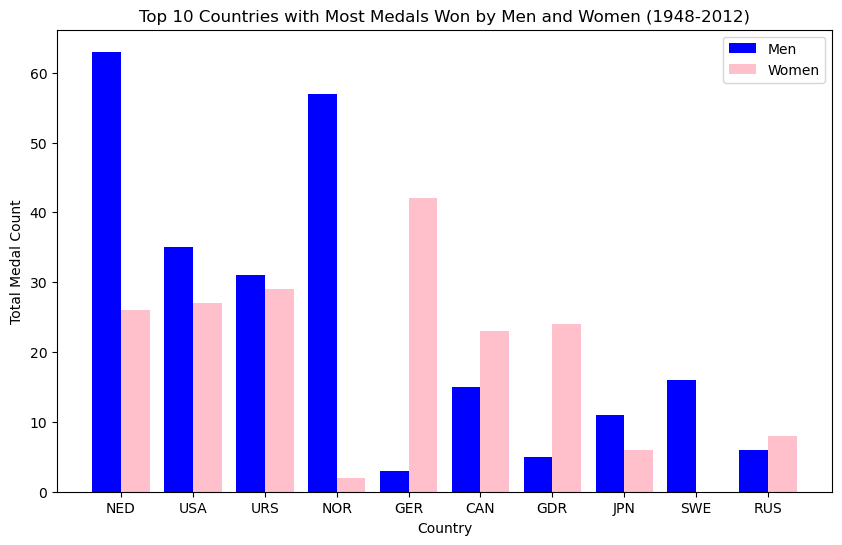

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the filtered speed skating data
filtered_data = pd.read_csv('filtered_speed_skate_data.csv')

# Group the data by country and gender
country_gender_medals = filtered_data.groupby(['Country', 'Gender'])['Medal'].count().unstack(fill_value=0)
country_gender_medals['Total Medals'] = country_gender_medals.sum(axis=1)
top_10_countries = country_gender_medals.sort_values(by='Total Medals', ascending=False).head(10)

# Create a double bar graph for total medals won by men and women
plt.figure(figsize=(10, 6))
x = range(len(top_10_countries))
total_medals_men = top_10_countries['Men']
total_medals_women = top_10_countries['Women']
bar_width = 0.4
plt.bar(x, total_medals_men, width=bar_width, label='Men', color='blue')
plt.bar([i + bar_width for i in x], total_medals_women, width=bar_width, label='Women', color='pink')

# Labels for the graph
plt.xlabel('Country')
plt.ylabel('Total Medal Count')
plt.title('Top 10 Countries with Most Medals Won by Men and Women (1948-2012)')
plt.xticks([i + bar_width/2 for i in x], top_10_countries.index)  # Set country names as x-axis labels
plt.legend()
plt.show()


In [83]:
#Importing pandas as pd 
import pandas as pd 
  
#Create the dataframe 
df = pd.DataFrame({'Country':['NED', 'USA', 'URS', 'NOR', 'GER', 'CAN', 'GDR', 'JPN', 'SWE', 'RUS' ], 
                    'Population':['16936520', '321418820', '286730819', '5195921', '81413145', '35851774', '16111000', '126958472', '9798871', '144096812']})
  
#Print dataframe 
print(df) 

  Country Population
0     NED   16936520
1     USA  321418820
2     URS  286730819
3     NOR    5195921
4     GER   81413145
5     CAN   35851774
6     GDR   16111000
7     JPN  126958472
8     SWE    9798871
9     RUS  144096812


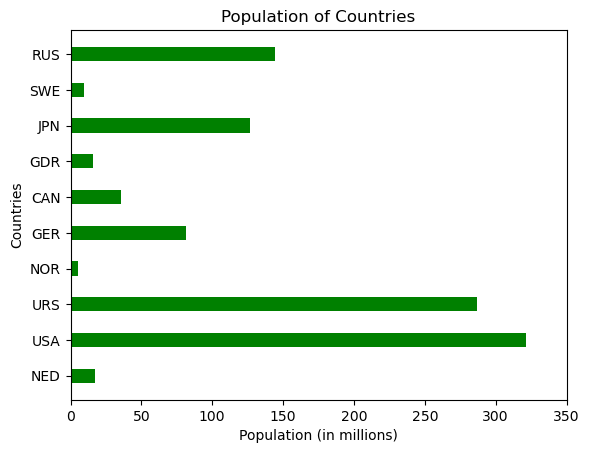

In [107]:
import matplotlib.pyplot as plt

#Setting x and y values
y = ['NED', 'USA', 'URS', 'NOR', 'GER', 'CAN', 'GDR', 'JPN', 'SWE', 'RUS']
x = [16.94, 321.42, 286.73, 5.19, 81.41, 35.85, 16.11, 126.95, 9.80, 144.10]  # Population in millions

#Setting color and size
color = 'green'  # Define a single color for all bars
bar_width = 0.5  # Width of the bars
bar_height = 0.4  # Height of the bars

#Setting labels
plt.barh(y, x, color=color, height=bar_height)
plt.xlabel("Population (in millions)")
plt.ylabel("Countries")
plt.title("Population of Countries")
plt.xlim(0, 350)  # Set the x-axis limits
plt.show()